In [1]:

import pandas as pd
feedback=pd.read_csv("customer_feedback_data.csv")
Metadata=pd.read_csv("customer_metadata_data.csv")
Info=pd.read_csv("product_information_data.csv")



Data1=Metadata.merge(feedback, on="Customer_ID")
Data2=Info.merge(feedback,on="Product_ID")

Data1.Feedback_Type
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data={"Feedback Type": ["Email","Survey","Social Media"],
      "Product": ["Those","College","Summer"],
      "Sentiment":["Negative","Positive","Neutral"]
}

In [4]:
data

{'Feedback Type': ['Email', 'Survey', 'Social Media'],
 'Product': ['Those', 'College', 'Summer'],
 'Sentiment': ['Negative', 'Positive', 'Neutral']}

In [5]:
df=pd.DataFrame(data)
df

,Feedback Type,Product,Sentiment
0,Email,Those,Negative
1,Survey,College,Positive
2,Social Media,Summer,Neutral


In [6]:
feedback_type_sentiment=df.groupby("Feedback Type")["Sentiment"].value_counts(normalize=True)*100

In [7]:
product_sentiment=df.groupby("Product")["Sentiment"].value_counts(normalize=True)*100

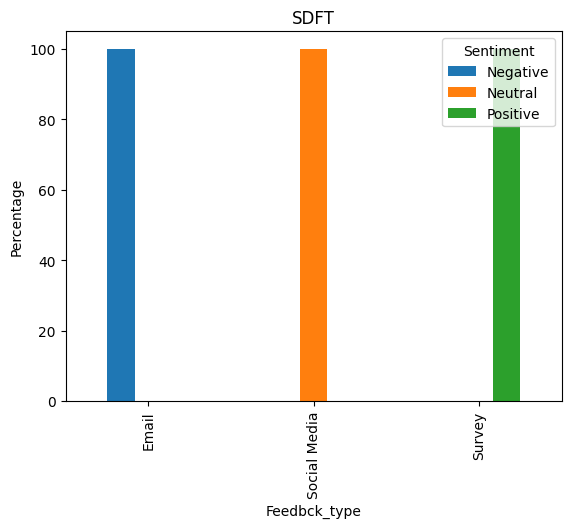

In [8]:
#df['Sentiment'].value_counts(normalize=True).plot(kind="bar")
feedback_type_sentiment.unstack().plot(kind="bar")
plt.title("SDFT")
plt.xlabel("Feedbck_type")
plt.ylabel("Percentage")
plt.show()

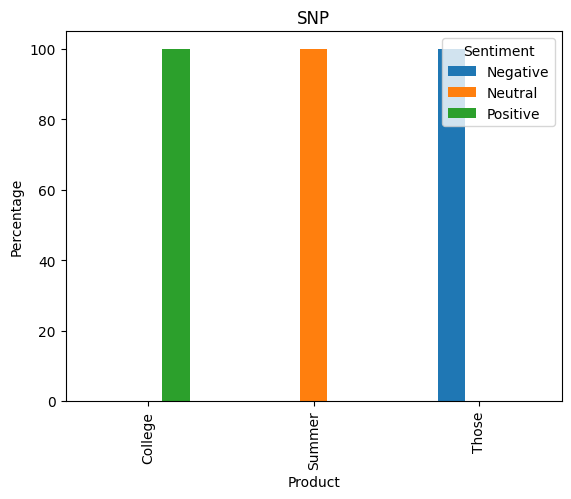

In [9]:

product_sentiment.unstack().plot(kind="bar")
plt.title("SNP")
plt.xlabel("Product")
plt.ylabel("Percentage")
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
data = {
    'Feedback Type': ['Complaint', 'Suggestion', 'Praise', 'Complaint', 'Suggestion', 'Praise'],
    'Product': ['Product A', 'Product B', 'Product A', 'Product B', 'Product C', 'Product C'],
    'Sentiment': ['Negative', 'Neutral', 'Positive', 'Negative', 'Positive', 'Positive']
}


In [12]:
df = pd.DataFrame(data)

In [13]:
feedback_type_sentiment = df['Sentiment'].value_counts(normalize=True) * 100

In [14]:
product_sentiment = df.groupby('Product')['Sentiment'].value_counts(normalize=True) * 100

In [15]:
print("Sentiment Distribution by Feedback Type:")
print(feedback_type_sentiment)
print("\nSentiment Distribution by Product:")
print(product_sentiment)

Sentiment Distribution by Feedback Type:
Sentiment
Positive    50.000000
Negative    33.333333
Neutral     16.666667
Name: proportion, dtype: float64

Sentiment Distribution by Product:
Product    Sentiment
Product A  Negative      50.0
           Positive      50.0
Product B  Negative      50.0
           Neutral       50.0
Product C  Positive     100.0
Name: proportion, dtype: float64


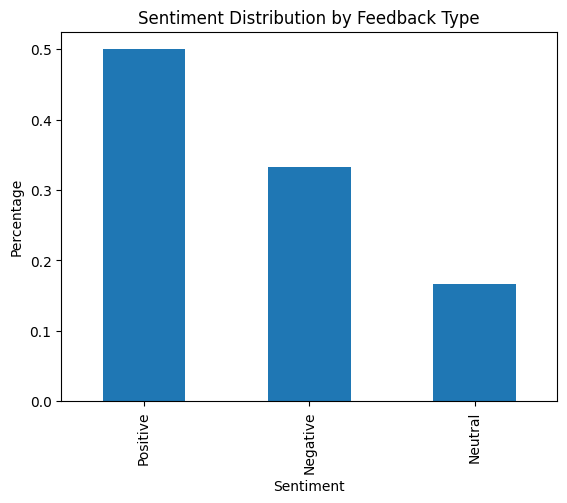

In [16]:
df['Sentiment'].value_counts(normalize=True).plot(kind='bar')
plt.title('Sentiment Distribution by Feedback Type')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()


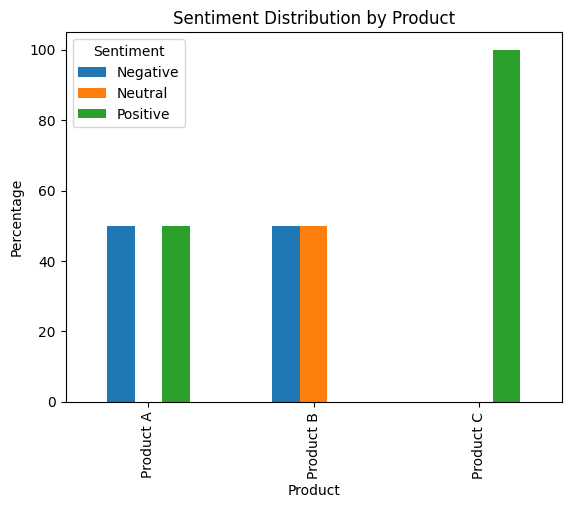

In [17]:
product_sentiment.unstack().plot(kind='bar')
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Percentage')
plt.show()


In [18]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models

# Sample feedback comments
feedback_comments = [
    "Great product, but poor customer service.",
    "Excellent features, but difficult to use.",
    "Good value for the price."
]

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for comment in feedback_comments for word in nltk.word_tokenize(comment) if word.isalpha() and word.lower() not in stop_words]

# Tokenization and POS tagging
tagged_tokens = nltk.pos_tag(tokens)

# Topic modeling
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens)]
lda_model = models.LdaModel(corpus, id2word=dictionary, passes=15)

# Keyword extraction
tfidf = models.TfidfModel(corpus)
keywords = tfidf[corpus]

# Print insights
print("Common themes:")
for topic in lda_model.print_topics(num_words=4):
    print(topic)

print("\nKeywords:")
for keyword in keywords:
    print(keyword)

Common themes:
(72, '0.083*"service" + 0.083*"use" + 0.083*"price" + 0.083*"feature"')
(28, '0.083*"service" + 0.083*"use" + 0.083*"price" + 0.083*"feature"')
(46, '0.083*"service" + 0.083*"use" + 0.083*"price" + 0.083*"feature"')
(64, '0.083*"service" + 0.083*"use" + 0.083*"price" + 0.083*"feature"')
(36, '0.083*"service" + 0.083*"use" + 0.083*"price" + 0.083*"feature"')
(45, '0.083*"service" + 0.083*"use" + 0.083*"price" + 0.083*"feature"')
(27, '0.083*"service" + 0.083*"use" + 0.083*"price" + 0.083*"feature"')
(89, '0.083*"service" + 0.083*"use" + 0.083*"price" + 0.083*"feature"')
(40, '0.083*"service" + 0.083*"use" + 0.083*"price" + 0.083*"feature"')
(67, '0.083*"service" + 0.083*"use" + 0.083*"price" + 0.083*"feature"')
(6, '0.083*"service" + 0.083*"use" + 0.083*"price" + 0.083*"feature"')
(71, '0.083*"service" + 0.083*"use" + 0.083*"price" + 0.083*"feature"')
(12, '0.083*"service" + 0.083*"use" + 0.083*"price" + 0.083*"feature"')
(55, '0.083*"service" + 0.083*"use" + 0.083*"price

In [4]:
from gensim.models import LdaModel

In [51]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
import string

feedback_comments = [
    "Term paper differentexpect old speech of patt...",
    "Smile use place cut outside medical stop identify",
    "Determine ground point staff speech degree tra",
    "Theory use main finish ball office maintain se",
    "Join threat check certain popular him we sever",
    "Head require paper article several significant",
  
    "Letter have tell like believe read attorney th",
	"I love the new feature!",
	"The product is okay, but the support is terrible.",
	"I'm so frustrated with the bugs.",
	"The user interface is amazing!",
	"I wish there were more customization options."
]


In [52]:
stop_words=set(stopwords.words("english"))
lemmatizer=WordNetLemmatizer()
tokens=[lemmatizer.lemmatize(word)
        for comment in feedback_comments 
        for word in word_tokenize(comment)
         if word.isalpha() and word.lower() not in stop_words ]

In [53]:
common_themes=Counter(tokens).most_common(10)
keyword =[word for word,freq in common_themes if freq>1]

In [54]:
print("Common_themes:") 
for word, freq  in common_themes:
    print(f"{word}:{freq}")

Common_themes:
paper:2
speech:2
use:2
Term:1
differentexpect:1
old:1
patt:1
Smile:1
place:1
cut:1


In [55]:
print(" Keywords:")
print(keyword)

 Keywords:
['paper', 'speech', 'use']


In [28]:
import nltk

print(nltk.__version__)

3.9.1
